In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 12.68GB
Available: 11.83GB
Used: 574.48MB
Percentage: 6.7%


# Required **Libraries**

In [ ]:
import numpy as np 
import pandas as pd  
import os #  to interact with files using there paths
from sklearn.datasets import load_files
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_hub as hub
# from tensorflow.keras.layers import Dense, Flatten, Conv2D
# from tensorflow.keras import Model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers

In [ ]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Version:  2.12.0
Eager mode:  True
Hub version:  0.13.0
GPU is NOT AVAILABLE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Access to drive** for files

In [ ]:
#The path of our data on drive
data_dir =  r'/content/drive/MyDrive/dataset'
 
#Loading our Data
data = load_files(data_dir)


# Data **Preprocessing** 


In [ ]:
folders=os.listdir("/content/drive/MyDrive/dataset")
print(folders)

['Gauva', 'Arjun', 'Lemon', 'Jamun', 'Mango', 'Pomegranate']


# **Here the data has two variables**
#**X - filenames (Training data)**
# **y - flower names(Target labels)**

In [ ]:
dri
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])
 
# How the arrays look like?
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/content/drive/MyDrive/dataset/Gauva/0015_0112.JPG'
 '/content/drive/MyDrive/dataset/Jamun/0017_0323.JPG'
 '/content/drive/MyDrive/dataset/Gauva/0004_0124.JPG' ...
 '/content/drive/MyDrive/dataset/Gauva/0015_0035.JPG'
 '/content/drive/MyDrive/dataset/Gauva/0015_0107.JPG'
 '/content/drive/MyDrive/dataset/Mango/0001_0131.JPG']
Target labels -  [1 2 1 ... 1 1 4]


# Remove .pyc or .py files

In [ ]:
pyc_file_pos = (np.where(file==X) for file in X if file.endswith(('.pyc','.py')))
for pos in pyc_file_pos:
    X = np.delete(X,pos)
    y = np.delete(y,pos)
    
print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  2516
Number of training targets :  2516


In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"

# Load IMAGES

In [ ]:
from tensorflow.keras.utils import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 150,150
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape) 
print('First training item : ',X[0])

(2516, 150, 150, 3)
First training item :  [[[54. 66. 78.]
  [58. 70. 84.]
  [58. 70. 84.]
  ...
  [43. 59. 75.]
  [45. 61. 76.]
  [44. 60. 76.]]

 [[54. 66. 80.]
  [54. 66. 80.]
  [58. 72. 85.]
  ...
  [48. 64. 79.]
  [44. 60. 75.]
  [53. 66. 82.]]

 [[56. 68. 82.]
  [56. 68. 82.]
  [62. 74. 88.]
  ...
  [52. 65. 81.]
  [49. 62. 78.]
  [44. 57. 73.]]

 ...

 [[38. 42. 45.]
  [41. 42. 46.]
  [38. 39. 43.]
  ...
  [31. 32. 34.]
  [30. 31. 33.]
  [30. 30. 32.]]

 [[41. 42. 47.]
  [44. 45. 49.]
  [36. 37. 41.]
  ...
  [32. 32. 34.]
  [33. 33. 35.]
  [26. 26. 28.]]

 [[36. 37. 41.]
  [40. 41. 45.]
  [37. 38. 43.]
  ...
  [29. 29. 31.]
  [28. 28. 30.]
  [29. 29. 31.]]]


Few Take Aways
# Note that the shape of training data is (1105, 150, 150, 3)
1105 is the number of training items or files,
(150,150) is the target size or image size provided while loading image
3 refers to the depth for colored images ( RGB channels ).

# Looking for Some Picture

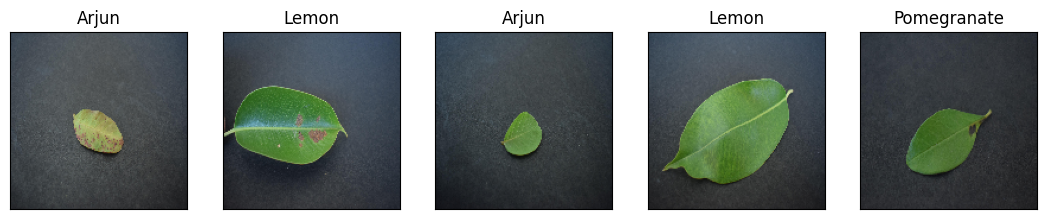

In [ ]:
#Let's look at first 5 training data.

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

NOTE:
We need to rescale the images here, reason being for more accuracy

Google Explaianation
rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor. So all values in X will lie within 0 to 1 !

# **RESCALE**

In [ ]:
# resize or rescale training data
X = X.astype('float32')/255
 
# confirm the number of classes 
no_of_classes = len(np.unique(y))
no_of_classes

6

In [ ]:
y

array([1, 2, 1, ..., 1, 1, 4])

#Converts a class vector (integers) to binary class matrix

In [ ]:
from keras.utils import np_utils

# let's converts a class vector (integers) to binary class matrix.
y = np.array(np_utils.to_categorical(y,no_of_classes))
y[0]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

**Splite the DATA (Someting like divide and conquer)**

In [ ]:
from sklearn.model_selection import train_test_split

# splite the data into subsets and explore their shapes

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])
 
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.8)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  504
The training Data Shape  404


Here it will show shape

In [ ]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


# **CNN (Convolutional Neural Network)**

---



This will inculde keras

# necessary libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# From Google about CNN
CNN Architecture
I will be using Sequential method as I am creating a sequential model. Sequential model means that all the layers of the model will be arranged in sequence, then i will add:

2 x convolution layer of 32 channel of 3x3 kernal and same padding;
1 x maxpool layer of 2x2 pool size;
1 x droupt with a frequency of rate equal to 0.25;
2 x convolution layer of 64 channel of 3x3 kernal and same padding:
1 x maxpool layer of 2x2 pool size
1 x droupt with a frequency of rate equal to 0.25;
2 x convolution layer of 128 channel of 3x3 kernal and same padding;
1 x maxpool layer of 2x2 pool size;
1 x flatten;
1 x dense layer of 512
1 x dropout set at 0.5
1 x dense layer of 128
1 x Dense Softmax layer of 5 units
=> Dropout is a technique of regularisation which helps us to prevent overfitting.

If you noticed, I also add ReLu (Rectified Linear Unit) activation to each layers so that all the negative values are not passed to the next layer:


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.25))
    
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

In [ ]:
# Getting the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 Conv2D_2 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 Maxpool_1 (MaxPooling2D)    (None, 74, 74, 32)        0         
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 Conv2D_3 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 Conv2D_4 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 Maxpool_2 (MaxPooling2D)    (None, 36, 36, 64)        0

# Compile Model

In [ ]:
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
     

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
import time
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
 
# Time to train our model !
epochs = 60
batch_size=32
 
train_datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)
 
test_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)
 
validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)
 
checkpointer = ModelCheckpoint(filepath = "/gdrive/My Drive/PId_Best.h5", save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)
 

start = time.time()
 
# let's get started !
 
history=model.fit_generator(train_generator,
                            epochs=epochs,
                            validation_data = validation_generator,
                            verbose=1,
                            steps_per_epoch=len(X_train) // batch_size,
                            #validation_steps=len(X_valid) //batch_size,
                            callbacks=[checkpointer, learning_rate_reduction])
 
end = time.time()
 
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

<ipython-input-21-646f3cf407bb>:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


Epoch 1/65
62/62 [==============================] - ETA: 0s - loss: 1.7782 - accuracy: 0.2924
Epoch 1: val_loss improved from inf to 1.61987, saving model to /gdrive/My Drive/PId_Best.h5
62/62 [==============================] - 401s 6s/step - loss: 1.7782 - accuracy: 0.2924 - val_loss: 1.6199 - val_accuracy: 0.3243 - lr: 0.0010
Epoch 2/65
62/62 [==============================] - ETA: 0s - loss: 1.3600 - accuracy: 0.4369
Epoch 2: val_loss improved from 1.61987 to 1.09904, saving model to /gdrive/My Drive/PId_Best.h5
62/62 [==============================] - 400s 6s/step - loss: 1.3600 - accuracy: 0.4369 - val_loss: 1.0990 - val_accuracy: 0.6040 - lr: 0.0010
Epoch 3/65
62/62 [==============================] - ETA: 0s - loss: 1.2028 - accuracy: 0.5247
Epoch 3: val_loss improved from 1.09904 to 0.82613, saving model to /gdrive/My Drive/PId_Best.h5
62/62 [==============================] - 399s 6s/step - loss: 1.2028 - accuracy: 0.5247 - val_loss: 0.8261 - val_accuracy: 0.6832 - lr: 0.0010
Ep

In [ ]:
model.save("/content/drive/MyDrive/model_plantdetection_Updated_dataset.h5")

# Model Evaluation

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(  
     X_test, y_test, batch_size=batch_size, verbose=2)
 
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

4/4 - 4s - loss: 0.0322 - accuracy: 0.9800 - 4s/epoch - 940ms/step
Accuracy: 98.00%
Loss: 0.03223128989338875


# Graphs Acuuracy and Loss 

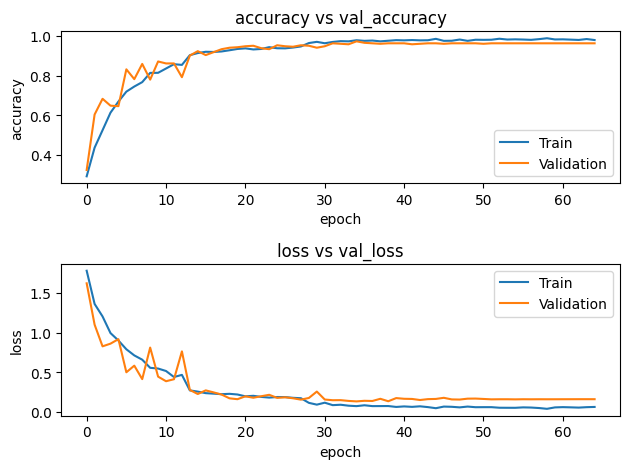

In [ ]:
import matplotlib.pyplot as plt 
def plot(history):
    plt.figure(1)
    #plt.figure(figsize=(10,10)) 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('accuracy vs val_accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='lower right')  
     # summarize history for loss   
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('loss vs val_loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
 
# call the plot function with the 'result' parameter 
 
plot(history)

# **Predict output**

In [ ]:
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))
     

1/4 [======>.......................] - ETA: 7s

# Visualization

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [ ]:
my_model=keras.models.load_model('/content/drive/MyDrive/Plant_Data/Arjun')
     

In [ ]:
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(my_model.predict(X_test))
     

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()